In [1]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../Data/강남 일별 시간대별 승객유형별 승하차인원.csv")

In [4]:
df.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,06시간대이전,06-07시간대,07-08시간대,08-09시간대,...,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후,월,년
0,2022-06-01,2.0,222,강남,승차,일반,806,472,395,554,...,3039,2948,2693,2855,3637,3575,1621,0.0,6,2022
1,2022-06-01,2.0,222,강남,승차,어린이,0,0,2,5,...,25,17,20,18,10,5,0,0.0,6,2022
2,2022-06-01,2.0,222,강남,승차,중고생,0,0,0,0,...,0,0,0,0,1,0,0,0.0,6,2022
3,2022-06-01,2.0,222,강남,승차,청소년,11,8,7,15,...,211,200,183,196,198,231,67,0.0,6,2022
4,2022-06-01,2.0,222,강남,승차,우대권,59,125,97,83,...,200,156,132,151,117,83,11,0.0,6,2022


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15200 entries, 0 to 15199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   수송일자      15200 non-null  object 
 1   호선명       15200 non-null  float64
 2   역번호       15200 non-null  int64  
 3   역명        15200 non-null  object 
 4   승하차구분     15200 non-null  object 
 5   승객유형      15200 non-null  object 
 6   06시간대이전   15200 non-null  int64  
 7   06-07시간대  15200 non-null  int64  
 8   07-08시간대  15200 non-null  int64  
 9   08-09시간대  15200 non-null  int64  
 10  09-10시간대  15200 non-null  int64  
 11  10-11시간대  15200 non-null  int64  
 12  11-12시간대  15200 non-null  int64  
 13  12-13시간대  15200 non-null  int64  
 14  13-14시간대  15200 non-null  int64  
 15  14-15시간대  15200 non-null  int64  
 16  15-16시간대  15200 non-null  int64  
 17  16-17시간대  15200 non-null  int64  
 18  17-18시간대  15200 non-null  int64  
 19  18-19시간대  15200 non-null  int64  
 20  19-20시간대  15200 non-null  in

In [6]:
print(df['승객유형'].unique())

['일반' '어린이' '중고생' '청소년' '우대권' '영어 일반' '일어 일반' '중국어 일반' '영어 어린이' '중국어 어린이'
 '일어 어린이' '직원' '공통']


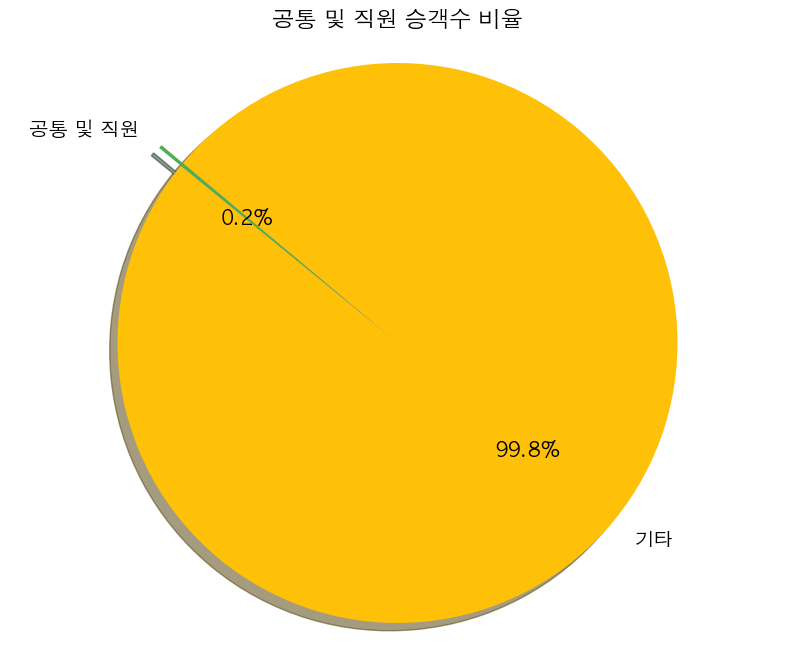

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 (실제 데이터를 df로 가정)
# df = pd.read_csv('your_dataset.csv')

# '공통'과 '직원' 데이터 필터링
common_employee_df = df[df['승객유형'].isin(['공통', '직원'])]

# 전체 승객 수와 '공통', '직원' 승객 수 계산
total_passenger_count = df.iloc[:, 6:-3].sum().sum()  # 06시간대이전부터 24시간대 이후 열 합계
common_employee_count = common_employee_df.iloc[:, 6:-3].sum().sum()

# 비율 계산
labels = ['공통 및 직원', '기타']
sizes = [common_employee_count, total_passenger_count - common_employee_count]

# 시각화
plt.figure(figsize=(10, 8))
colors = ['#4CAF50', '#FFC107']
explode = (0.1, 0)  # 공통 및 직원 비율 강조

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True, textprops={'fontsize': 14})

plt.title('공통 및 직원 승객수 비율', fontsize=16, fontweight='bold')
plt.axis('equal')  # 원형 비율 유지

plt.show()

In [8]:
df = df[~df['승객유형'].isin(['공통', '직원'])]

In [9]:
df['승객유형'].unique()

array(['일반', '어린이', '중고생', '청소년', '우대권', '영어 일반', '일어 일반', '중국어 일반',
       '영어 어린이', '중국어 어린이', '일어 어린이'], dtype=object)

In [10]:
# 나이대 분류 함수 (외국인은 별도 분류)
def categorize_age_group(passenger_type):
    if passenger_type == '어린이':
        return '어린이'
    elif passenger_type in ['일반', '중고생', '청소년']:
        return '일반'
    elif passenger_type == '우대권':
        return '우대권'
    elif passenger_type in ['영어 어린이', '중국어 어린이', '일어 어린이',
                            '영어 일반', '중국어 일반', '일어 일반']:
        return '외국인'
    else:
        return '기타'

# 새로운 열 생성
df['나이대'] = df['승객유형'].apply(categorize_age_group)

# 결과 확인
print(df['나이대'].value_counts())

나이대
외국인    6836
일반     4386
어린이    1462
우대권    1462
Name: count, dtype: int64


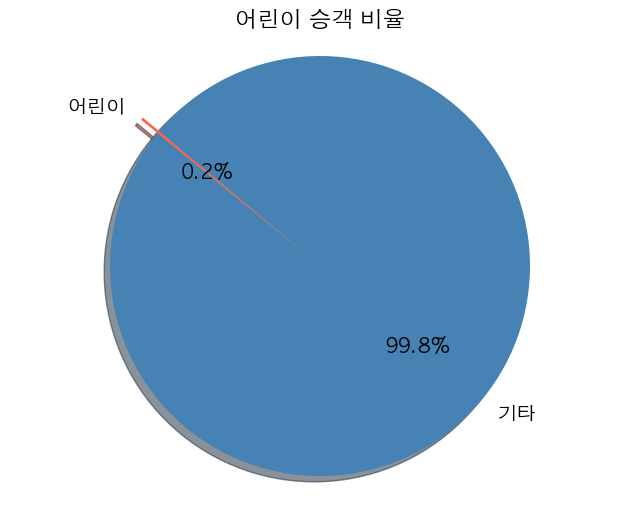

In [11]:
import matplotlib.pyplot as plt

# 전체 승객 수 계산
time_columns = df.columns[6:-3]  # 시간대 열(06시간대이전부터 24시간대이후까지) 선택
total_passenger_count = df[time_columns].sum().sum()  # 시간대별 전체 승객 수 합계

# 어린이 승객 수 계산
child_passenger_count = df[df['나이대'] == '어린이'][time_columns].sum().sum()  # '어린이' 나이대의 승객 수 합계

# 비율 계산
labels = ['어린이', '기타']
sizes = [child_passenger_count, total_passenger_count - child_passenger_count]

# 시각화
plt.figure(figsize=(8, 6))
colors = ['#FF6347', '#4682B4']  # 어린이 승객: 밝은 빨강, 기타 승객: 파랑
explode = (0.1, 0)  # 어린이 승객 강조

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True, textprops={'fontsize': 14})

plt.title('어린이 승객 비율', fontsize=16, fontweight='bold', color='black')
plt.axis('equal')  # 원형 비율 유지
plt.show()

In [12]:
df.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,06시간대이전,06-07시간대,07-08시간대,08-09시간대,...,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후,월,년,나이대
0,2022-06-01,2.0,222,강남,승차,일반,806,472,395,554,...,2948,2693,2855,3637,3575,1621,0.0,6,2022,일반
1,2022-06-01,2.0,222,강남,승차,어린이,0,0,2,5,...,17,20,18,10,5,0,0.0,6,2022,어린이
2,2022-06-01,2.0,222,강남,승차,중고생,0,0,0,0,...,0,0,0,1,0,0,0.0,6,2022,일반
3,2022-06-01,2.0,222,강남,승차,청소년,11,8,7,15,...,200,183,196,198,231,67,0.0,6,2022,일반
4,2022-06-01,2.0,222,강남,승차,우대권,59,125,97,83,...,156,132,151,117,83,11,0.0,6,2022,우대권


In [13]:
# 불필요한 열 삭제
df = df.drop(columns=['호선명', '역번호', '역명'])

# 결과 확인
print(df.head())

         수송일자 승하차구분 승객유형  06시간대이전  06-07시간대  07-08시간대  08-09시간대  09-10시간대  \
0  2022-06-01    승차   일반      806       472       395       554       687   
1  2022-06-01    승차  어린이        0         0         2         5         4   
2  2022-06-01    승차  중고생        0         0         0         0         0   
3  2022-06-01    승차  청소년       11         8         7        15        20   
4  2022-06-01    승차  우대권       59       125        97        83        90   

   10-11시간대  11-12시간대  ...  18-19시간대  19-20시간대  20-21시간대  21-22시간대  22-23시간대  \
0       875      1290  ...      2948      2693      2855      3637      3575   
1        14        17  ...        17        20        18        10         5   
2         0         0  ...         0         0         0         1         0   
3        36        47  ...       200       183       196       198       231   
4       116       156  ...       156       132       151       117        83   

   23-24시간대  24시간대이후  월     년  나이대  
0      1621      0.

In [14]:
df.head()

,수송일자,승하차구분,승객유형,06시간대이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,...,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후,월,년,나이대
0,2022-06-01,승차,일반,806,472,395,554,687,875,1290,...,2948,2693,2855,3637,3575,1621,0.0,6,2022,일반
1,2022-06-01,승차,어린이,0,0,2,5,4,14,17,...,17,20,18,10,5,0,0.0,6,2022,어린이
2,2022-06-01,승차,중고생,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,6,2022,일반
3,2022-06-01,승차,청소년,11,8,7,15,20,36,47,...,200,183,196,198,231,67,0.0,6,2022,일반
4,2022-06-01,승차,우대권,59,125,97,83,90,116,156,...,156,132,151,117,83,11,0.0,6,2022,우대권


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14146 entries, 0 to 15199
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   수송일자      14146 non-null  object 
 1   승하차구분     14146 non-null  object 
 2   승객유형      14146 non-null  object 
 3   06시간대이전   14146 non-null  int64  
 4   06-07시간대  14146 non-null  int64  
 5   07-08시간대  14146 non-null  int64  
 6   08-09시간대  14146 non-null  int64  
 7   09-10시간대  14146 non-null  int64  
 8   10-11시간대  14146 non-null  int64  
 9   11-12시간대  14146 non-null  int64  
 10  12-13시간대  14146 non-null  int64  
 11  13-14시간대  14146 non-null  int64  
 12  14-15시간대  14146 non-null  int64  
 13  15-16시간대  14146 non-null  int64  
 14  16-17시간대  14146 non-null  int64  
 15  17-18시간대  14146 non-null  int64  
 16  18-19시간대  14146 non-null  int64  
 17  19-20시간대  14146 non-null  int64  
 18  20-21시간대  14146 non-null  int64  
 19  21-22시간대  14146 non-null  int64  
 20  22-23시간대  14146 non-null  int64  

In [16]:
# 시간대 열 목록 정의
time_columns = [
    '06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대', 
    '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대',
    '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대',
    '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후'
]

# 시간대별로 승차와 하차 데이터를 합산
df_grouped = df.groupby(['수송일자', '승객유형', '나이대'], as_index=False)[time_columns].sum()

# 결과 확인
print(df_grouped.head())

         수송일자    승객유형  나이대  06시간대이전  06-07시간대  07-08시간대  08-09시간대  09-10시간대  \
0  2022-06-01     어린이  어린이        0         0         2         7        17   
1  2022-06-01  영어 어린이  외국인        0         0         0         0         0   
2  2022-06-01   영어 일반  외국인        6         0         0         0         1   
3  2022-06-01     우대권  우대권      116       349       232       205       249   
4  2022-06-01      일반   일반      927      1073      1256      2333      3591   

   10-11시간대  11-12시간대  ...  15-16시간대  16-17시간대  17-18시간대  18-19시간대  19-20시간대  \
0        33        34  ...        61        63        56        42        35   
1         0         0  ...         0         0         0         2         1   
2         2         3  ...         7         5         3         9         3   
3       289       395  ...       464       419       345       250       209   
4      3280      3749  ...      5339      5917      5828      5360      4462   

   20-21시간대  21-22시간대  22-23시간대  23-24시간대  2

In [17]:
df_grouped.head()

,수송일자,승객유형,나이대,06시간대이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후
0,2022-06-01,어린이,어린이,0,0,2,7,17,33,34,...,61,63,56,42,35,42,15,5,0,0.0
1,2022-06-01,영어 어린이,외국인,0,0,0,0,0,0,0,...,0,0,0,2,1,1,2,0,0,0.0
2,2022-06-01,영어 일반,외국인,6,0,0,0,1,2,3,...,7,5,3,9,3,6,12,5,1,0.0
3,2022-06-01,우대권,우대권,116,349,232,205,249,289,395,...,464,419,345,250,209,220,174,117,27,0.0
4,2022-06-01,일반,일반,927,1073,1256,2333,3591,3280,3749,...,5339,5917,5828,5360,4462,4514,4921,4445,2258,0.0


In [18]:
# '승객유형' 열 제거
df_grouped = df_grouped.drop(columns=['승객유형'])

# 결과 확인
df_grouped.head()

,수송일자,나이대,06시간대이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후
0,2022-06-01,어린이,0,0,2,7,17,33,34,45,...,61,63,56,42,35,42,15,5,0,0.0
1,2022-06-01,외국인,0,0,0,0,0,0,0,0,...,0,0,0,2,1,1,2,0,0,0.0
2,2022-06-01,외국인,6,0,0,0,1,2,3,3,...,7,5,3,9,3,6,12,5,1,0.0
3,2022-06-01,우대권,116,349,232,205,249,289,395,353,...,464,419,345,250,209,220,174,117,27,0.0
4,2022-06-01,일반,927,1073,1256,2333,3591,3280,3749,4640,...,5339,5917,5828,5360,4462,4514,4921,4445,2258,0.0


In [19]:
df_grouped.head(10)

,수송일자,나이대,06시간대이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후
0,2022-06-01,어린이,0,0,2,7,17,33,34,45,...,61,63,56,42,35,42,15,5,0,0.0
1,2022-06-01,외국인,0,0,0,0,0,0,0,0,...,0,0,0,2,1,1,2,0,0,0.0
2,2022-06-01,외국인,6,0,0,0,1,2,3,3,...,7,5,3,9,3,6,12,5,1,0.0
3,2022-06-01,우대권,116,349,232,205,249,289,395,353,...,464,419,345,250,209,220,174,117,27,0.0
4,2022-06-01,일반,927,1073,1256,2333,3591,3280,3749,4640,...,5339,5917,5828,5360,4462,4514,4921,4445,2258,0.0
5,2022-06-01,외국인,0,0,0,0,0,0,0,2,...,2,0,0,1,0,1,0,0,0,0.0
6,2022-06-01,일반,0,0,0,0,2,1,0,3,...,1,3,1,1,0,1,1,0,0,0.0
7,2022-06-01,외국인,0,0,0,0,0,1,1,0,...,0,0,2,0,0,0,0,0,0,0.0
8,2022-06-01,일반,12,12,24,69,147,171,193,232,...,328,398,385,378,254,302,277,275,94,0.0
9,2022-06-02,어린이,0,0,2,3,13,7,9,6,...,18,22,17,19,16,11,9,4,2,0.0


In [20]:
# '수송일자'가 '2022-06-01'인 데이터 필터링
filtered_data = df_grouped[df_grouped['수송일자'] == '2022-06-01']

# 결과 확인
filtered_data.head(9)

,수송일자,나이대,06시간대이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후
0,2022-06-01,어린이,0,0,2,7,17,33,34,45,...,61,63,56,42,35,42,15,5,0,0.0
1,2022-06-01,외국인,0,0,0,0,0,0,0,0,...,0,0,0,2,1,1,2,0,0,0.0
2,2022-06-01,외국인,6,0,0,0,1,2,3,3,...,7,5,3,9,3,6,12,5,1,0.0
3,2022-06-01,우대권,116,349,232,205,249,289,395,353,...,464,419,345,250,209,220,174,117,27,0.0
4,2022-06-01,일반,927,1073,1256,2333,3591,3280,3749,4640,...,5339,5917,5828,5360,4462,4514,4921,4445,2258,0.0
5,2022-06-01,외국인,0,0,0,0,0,0,0,2,...,2,0,0,1,0,1,0,0,0,0.0
6,2022-06-01,일반,0,0,0,0,2,1,0,3,...,1,3,1,1,0,1,1,0,0,0.0
7,2022-06-01,외국인,0,0,0,0,0,1,1,0,...,0,0,2,0,0,0,0,0,0,0.0
8,2022-06-01,일반,12,12,24,69,147,171,193,232,...,328,398,385,378,254,302,277,275,94,0.0


In [21]:
# 같은 수송일자와 나이대를 기준으로 시간대별 이용객수를 합산
df_grouped_final = df_grouped.groupby(['수송일자', '나이대'], as_index=False).sum()

# 결과 확인
df_grouped_final.head()

,수송일자,나이대,06시간대이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후
0,2022-06-01,어린이,0,0,2,7,17,33,34,45,...,61,63,56,42,35,42,15,5,0,0.0
1,2022-06-01,외국인,6,0,0,0,1,3,4,5,...,9,5,5,12,4,8,14,5,1,0.0
2,2022-06-01,우대권,116,349,232,205,249,289,395,353,...,464,419,345,250,209,220,174,117,27,0.0
3,2022-06-01,일반,939,1085,1280,2402,3740,3452,3942,4875,...,5668,6318,6214,5739,4716,4817,5199,4720,2352,0.0
4,2022-06-02,어린이,0,0,2,3,13,7,9,6,...,18,22,17,19,16,11,9,4,2,0.0


In [22]:
df_grouped_final.head(10)

,수송일자,나이대,06시간대이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후
0,2022-06-01,어린이,0,0,2,7,17,33,34,45,...,61,63,56,42,35,42,15,5,0,0.0
1,2022-06-01,외국인,6,0,0,0,1,3,4,5,...,9,5,5,12,4,8,14,5,1,0.0
2,2022-06-01,우대권,116,349,232,205,249,289,395,353,...,464,419,345,250,209,220,174,117,27,0.0
3,2022-06-01,일반,939,1085,1280,2402,3740,3452,3942,4875,...,5668,6318,6214,5739,4716,4817,5199,4720,2352,0.0
4,2022-06-02,어린이,0,0,2,3,13,7,9,6,...,18,22,17,19,16,11,9,4,2,0.0
5,2022-06-02,외국인,0,0,0,1,3,2,0,8,...,12,8,4,2,3,0,5,1,2,0.0
6,2022-06-02,우대권,263,618,466,554,772,811,760,712,...,1186,994,832,542,376,280,230,147,55,0.0
7,2022-06-02,일반,460,2173,7909,16225,14992,6371,4806,5178,...,6248,7735,12339,20153,11523,7502,7839,7785,3247,0.0
8,2022-06-03,어린이,0,0,2,11,10,4,7,9,...,17,8,18,20,19,11,12,8,2,0.0
9,2022-06-03,외국인,0,0,0,0,0,2,2,2,...,4,8,7,6,4,6,7,2,1,0.0


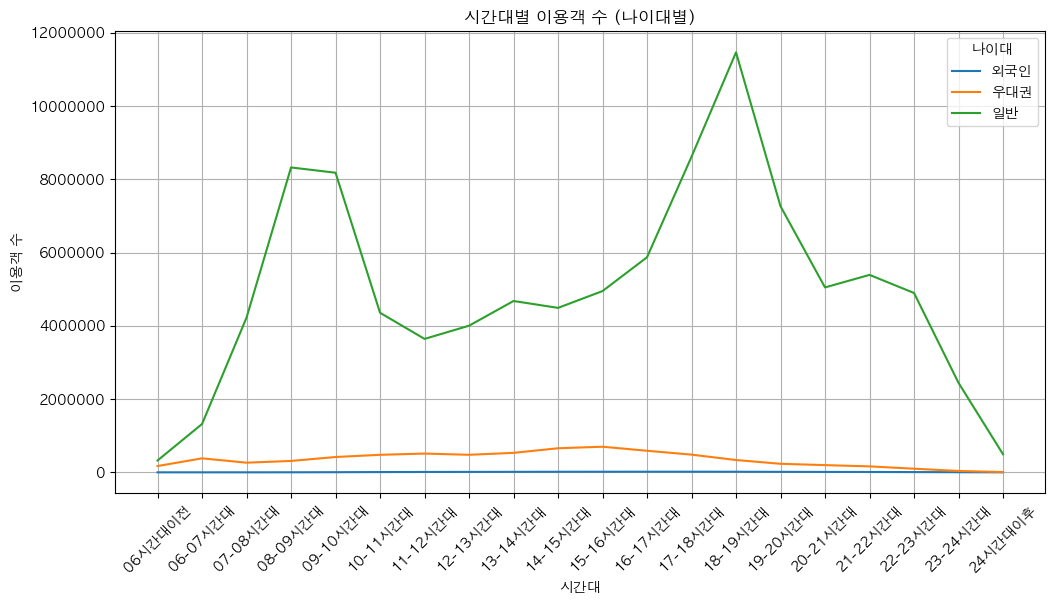

In [24]:
import matplotlib.ticker as mticker

# 시간대 열 목록
time_columns = [
    '06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대',
    '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대',
    '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대',
    '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후'
]

# 나이대별 시간대 합계 계산 (어린이 제외)
age_groups = df_grouped_final['나이대'].unique()
age_groups = [age for age in age_groups if age != '어린이']  # '어린이' 제외

# 그래프 그리기
plt.figure(figsize=(12, 6))
for age_group in age_groups:
    age_group_data = df_grouped_final[df_grouped_final['나이대'] == age_group]
    time_data = age_group_data[time_columns].sum()
    plt.plot(time_columns, time_data, label=age_group)

# 그래프 꾸미기
plt.title('시간대별 이용객 수 (나이대별)')
plt.xlabel('시간대')
plt.ylabel('이용객 수')
plt.xticks(rotation=45)
plt.legend(title='나이대')
plt.grid(True)

# Y축 숫자 형식을 일반 숫자로 설정
ax = plt.gca()  # 현재 축 가져오기
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_useOffset(False)  # 오프셋 비활성화
ax.yaxis.get_major_formatter().set_scientific(False)  # 지수 표현 비활성화

plt.show()

In [ ]:
df_grouped_final.info()

In [ ]:
import holidays

# 한국 공휴일 설정
kr_holidays = holidays.KR()

# '수송일자'를 datetime 형식으로 변환
df_grouped_final['수송일자'] = pd.to_datetime(df_grouped_final['수송일자'])

# 요일 추가 (0: 월요일, ..., 6: 일요일)
df_grouped_final['요일'] = df_grouped_final['수송일자'].dt.dayofweek

# 주말 여부 추가 (5: 토요일, 6: 일요일 -> 주말)
df_grouped_final['주말'] = df_grouped_final['요일'].apply(lambda x: 1 if x >= 5 else 0)

# 공휴일 여부 추가 (1: 공휴일, 0: 평일)
df_grouped_final['공휴일'] = df_grouped_final['수송일자'].apply(lambda x: 1 if x in kr_holidays else 0)

# 결과 확인
print(df_grouped_final[['수송일자', '요일', '주말', '공휴일']].head())

In [ ]:
df_grouped_final.head(10)

In [ ]:
# 시간대 열 목록 정의
time_columns = [
    '06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대',
    '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대',
    '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대',
    '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후'
]

# long format으로 변환
df_long = pd.melt(
    df_grouped_final,
    id_vars=['수송일자', '나이대', '요일', '주말', '공휴일'],  # 그대로 유지할 열
    value_vars=time_columns,  # 변환할 열
    var_name='시간대',  # 새로 생성할 열 이름
    value_name='이용객수'  # 값이 들어갈 열 이름
)

# 결과 확인
df_long.head(10)

In [ ]:
df_long.tail(10)

In [ ]:
# 나이대를 열로 변환 (pivot)
df_pivot = df_long.pivot_table(
    index=['수송일자', '요일', '주말', '공휴일', '시간대'],  # 고정할 열
    columns='나이대',  # 열로 변환할 변수
    values='이용객수',  # 값으로 사용할 변수
    aggfunc='sum'  # 중복된 경우 합산
).reset_index()

# 열 이름 정리
df_pivot.columns.name = None  # 열 이름의 계층 제거

# 결과 확인
df_pivot.head()

In [ ]:
# 시간대를 숫자로 변환하는 함수
def convert_time_to_hour(time_str):
    if '이전' in time_str:
        return 5  # 06시간대이전 -> 5로 설정
    elif '이후' in time_str:
        return 24  # 24시간대이후 -> 24로 설정
    else:
        # 시간대에서 시작 시간을 숫자로 변환
        return int(time_str.split('-')[0])

# 변환 적용
df_pivot['시간대'] = df_pivot['시간대'].apply(convert_time_to_hour)

# 결과 확인
df_pivot[['시간대']].drop_duplicates().sort_values(by='시간대')

In [ ]:
df_pivot.head(10)

In [ ]:
df_pivot.info()

In [ ]:
# 수송일자와 시간대 기준으로 정렬
df_pivot = df_pivot.sort_values(by=['수송일자', '시간대']).reset_index(drop=True)

# 결과 확인
df_pivot.head(10)

In [33]:
# 데이터를 CSV 파일로 저장
df_pivot.to_csv('../Data/강남 일별 시간대별 승객유형별 승하차인원 정리.csv', index=False)